# 490 GeoSpatial Data Science Final: Whale Migration: Temperature Analysis
### Gage Doyle
#### 05/17/2024


In [74]:
import numpy as np
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os
import netCDF4
import h5netcdf
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [112]:

# Define the directory containing the files
directory = "C:/Users/gaged/Desktop/Final Project/migration/Temperature/Data/e4/"

# Define the spatial extent
lat_min, lat_max = 4.606, 53.148
lon_min, lon_max = -165.662, 176.676

# Empty xarray dataset to store merged data
merged_1999 = None
merged_2008 = None

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".nc"):  # Check if the file is a netCDF file
        file_path = os.path.join(directory, filename)
        # Load dataset
        dataset = xr.open_dataset(file_path)
        # Select data using the nearest latitude and longitude within the specified range
        subset = dataset['sst'].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        # Extract the time period from the filename
        time_period = filename.split(".")[2]  # Assuming the filename format is "ersst.v4.yyyymm.nc"
        # Merge subsets sequentially for 1999
        if time_period.startswith("1999"):
            if merged_1999 is None:
                merged_1999 = subset
            else:
                merged_1999 = xr.merge([merged_1999, subset])
        # Merge subsets sequentially for 2008
        elif time_period.startswith("2008"):
            if merged_2008 is None:
                merged_2008 = subset
            else:
                merged_2008 = xr.merge([merged_2008, subset])

# Now you have merged datasets for 1999 and 2008 without using concat or combine_first


In [135]:
merged_2008

<xarray.Dataset> Size: 104kB
Dimensions:  (lat: 24, lev: 1, lon: 89, time: 12)
Coordinates:
  * lat      (lat) float64 192B 6.0 8.0 10.0 12.0 14.0 ... 46.0 48.0 50.0 52.0
  * lev      (lev) float64 8B 0.0
  * lon      (lon) float64 712B 0.0 2.0 4.0 6.0 8.0 ... 170.0 172.0 174.0 176.0
  * time     (time) datetime64[ns] 96B 2008-01-01 2008-02-01 ... 2008-12-01
Data variables:
    sst      (time, lev, lat, lon) float32 103kB 28.68 28.71 ... 4.704 4.594
Attributes:
    long_name:      Extended reconstructed sea surface temperature
    standard_name:  SST
    units:          degree_C
    valid_min:      -3.0
    valid_max:      45.0

In [143]:
# Assuming 'data_array' is the variable name you want to convert to a DataArray
data_array = merged_2008.to_array().squeeze()

data_array

<xarray.DataArray (time: 12, lat: 24, lon: 89)> Size: 103kB
array([[[28.683302 , 28.714996 , 28.864174 , ..., 28.055794 ,
         27.940378 , 27.859875 ],
        [       nan,        nan,        nan, ..., 27.805792 ,
         27.72529  , 27.671543 ],
        [       nan,        nan,        nan, ..., 27.504276 ,
         27.439615 , 27.341244 ],
        ...,
        [       nan,        nan,        nan, ...,  3.7462845,
          3.9202187,  4.0145226],
        [       nan,        nan,        nan, ...,  3.4271352,
          3.5048265,  3.5361123],
        [ 8.924149 ,  7.9093814,  7.465891 , ...,  3.2891047,
          3.3492336,  3.3291535]],

       [[28.354141 , 28.402573 , 28.571932 , ..., 27.613552 ,
         27.525606 , 27.462631 ],
        [       nan,        nan,        nan, ..., 27.435238 ,
         27.373922 , 27.331755 ],
        [       nan,        nan,        nan, ..., 27.175718 ,
         27.120617 , 27.030025 ],
...
        [       nan,        nan,        nan, ...,  7.9798155,
          8.055439 ,  8.072341 ],
        [       nan,        nan,        nan, ...,  7.075568 ,
          7.05122  ,  7.010581 ],
        [12.1755   , 11.529699 , 11.255708 , ...,  6.384743 ,
          6.317434 ,  6.216503 ]],

       [[28.413628 , 28.404505 , 28.489145 , ..., 28.668121 ,
         28.581432 , 28.53008  ],
        [       nan,        nan,        nan, ..., 28.405663 ,
         28.346298 , 28.325418 ],
        [       nan,        nan,        nan, ..., 28.069172 ,
         28.024677 , 27.967243 ],
        ...,
        [       nan,        nan,        nan, ...,  5.8318896,
          5.8673835,  5.8371444],
        [       nan,        nan,        nan, ...,  5.1968727,
          5.1543837,  5.086124 ],
        [ 9.977967 ,  9.1554985,  8.823442 , ...,  4.757442 ,
          4.7043715,  4.594481 ]]], dtype=float32)
Coordinates:
  * lat       (lat) float64 192B 6.0 8.0 10.0 12.0 14.0 ... 46.0 48.0 50.0 52.0
    lev       float64 8B 0.0
  * lon       (lon) float64 712B 0.0 2.0 4.0 6.0 8.0 ... 170.0 172.0 174.0 176.0
  * time      (time) datetime64[ns] 96B 2008-01-01 2008-02-01 ... 2008-12-01
    variable  <U3 12B 'sst'
Attributes:
    long_name:      Extended reconstructed sea surface temperature
    standard_name:  SST
    units:          degree_C
    valid_min:      -3.0
    valid_max:      45.0

TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_dataarray()` method.

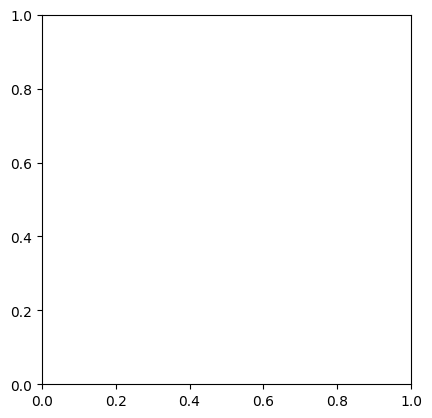

In [145]:
import matplotlib.pyplot as plt

# Select the first time step
data_slice = merged_2008.isel(time=0)

# Plot the data
plt.imshow(data_slice, cmap='viridis')  
plt.colorbar(label='Sea Surface Temperature (°C)')
plt.title('Sea Surface Temperature - 2008')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
# Locate the coldest, hottest, and avg temp location in both the '08 &'99 extent

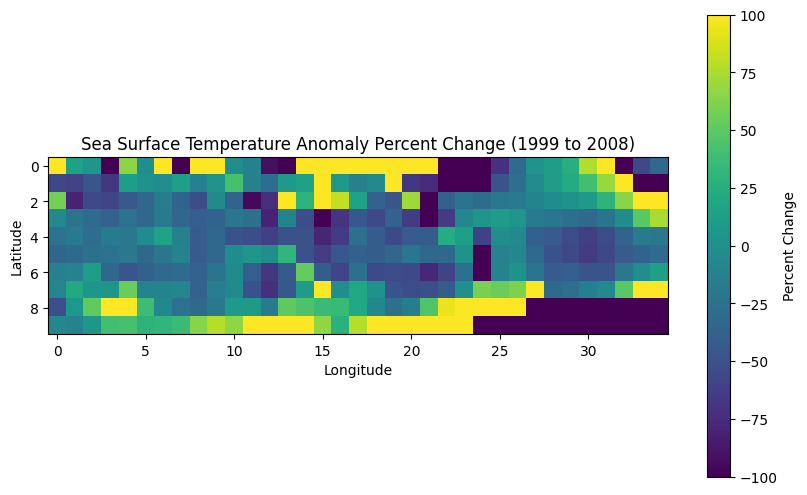

In [81]:
# Calculate the percent change in temperature anomaly
percent_change = ((avg_sst_2008 - avg_sst_1999) / avg_sst_1999) * 100

percent_change_squeezed = percent_change.squeeze()  
# Plot the percent change map
plt.figure(figsize=(10, 6))
plt.imshow(percent_change_squeezed['anom'], cmap='viridis', vmin=-100, vmax=100)
plt.colorbar(label='Percent Change')
plt.title('Sea Surface Temperature Anomaly Percent Change (1999 to 2008)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
